# 7. 선형회귀

## 실습7.3 선형회귀
### 1. 데이터준비

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


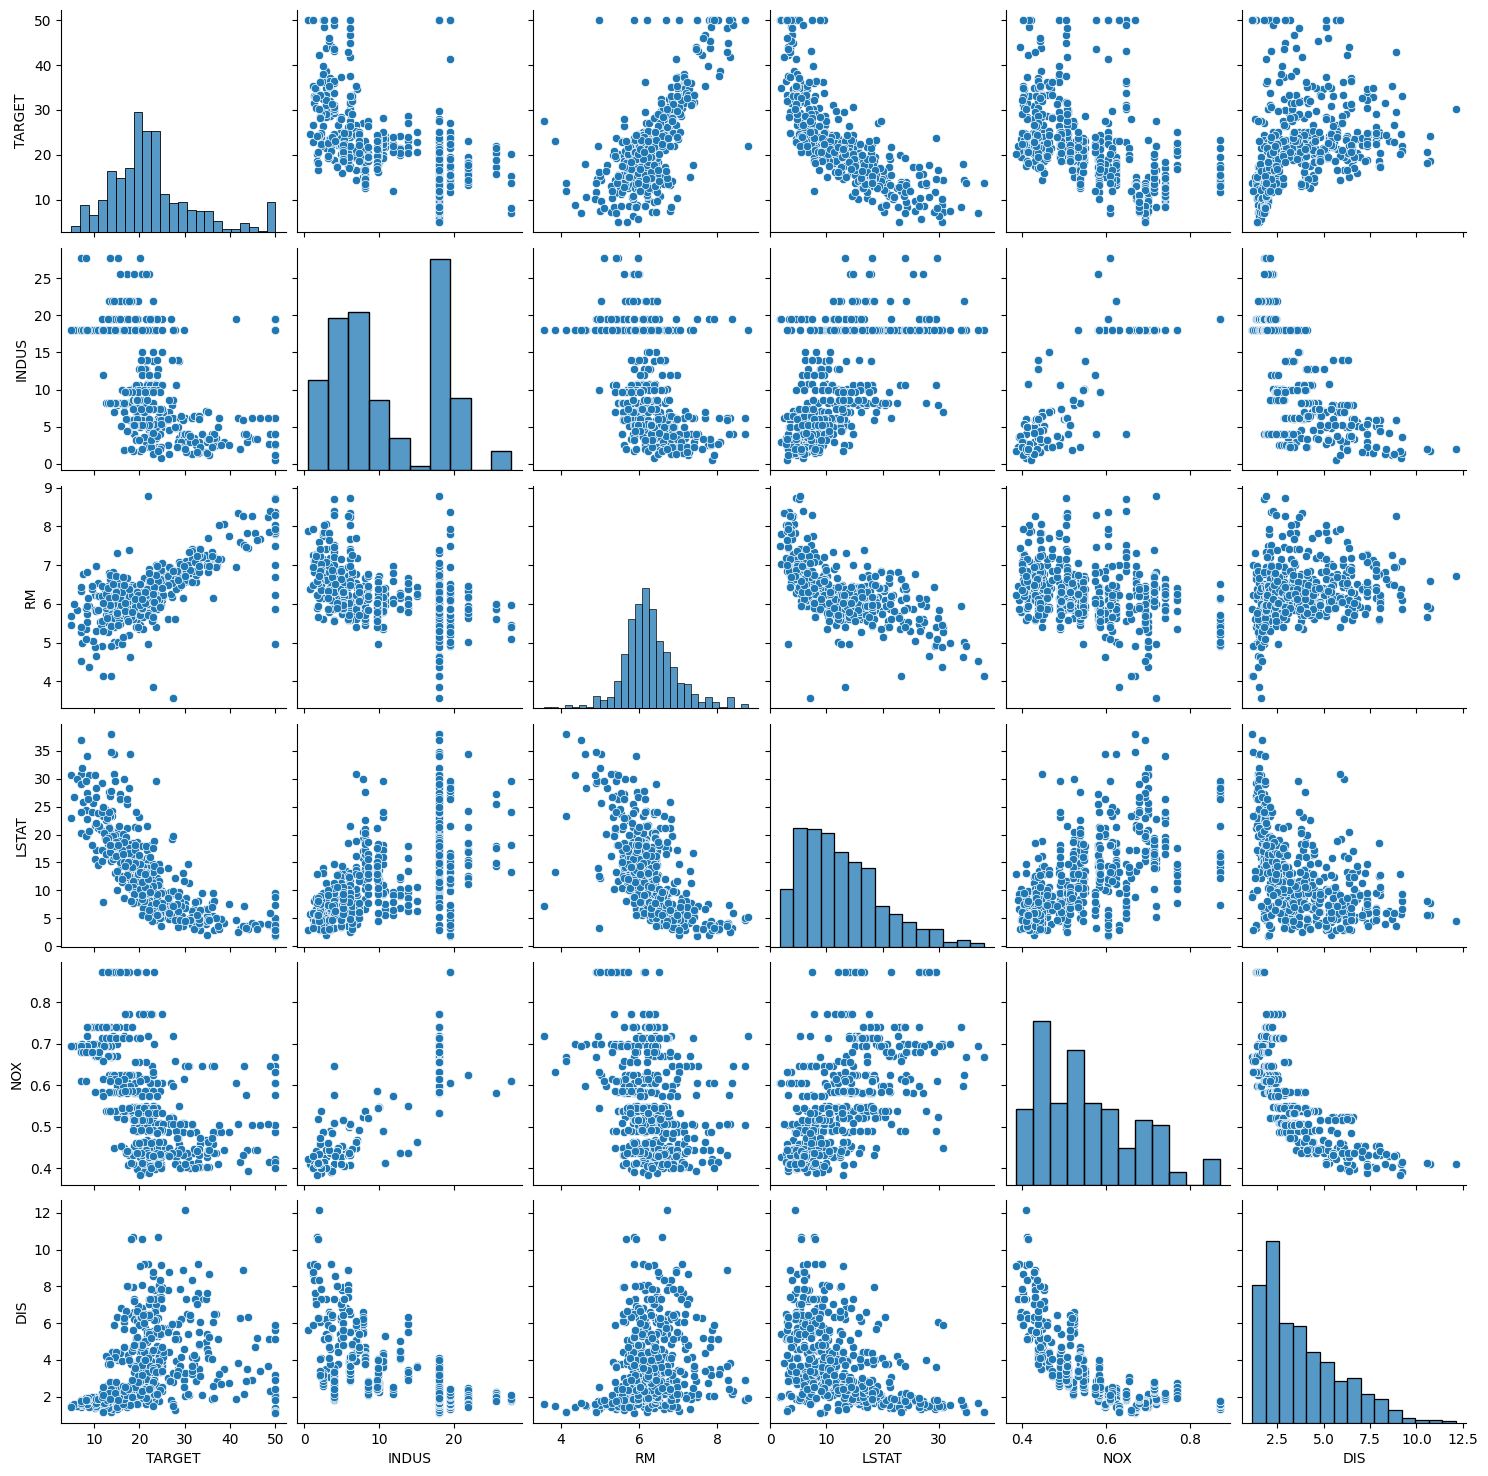

In [8]:
cols = ['TARGET', 'INDUS', 'RM', 'LSTAT', 'NOX', 'DIS']
sns.pairplot(df[cols])

### 2. 학습 코드 구현

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
# numpy 데이터를 torch tensor로 변경
data = torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([506, 6])

In [11]:
# x y
x = data[:, 1:]
y = data[:, :1]
print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [12]:
# 학습에 필요한 값 설정
n_epochs = 2000
lr = 1e-3
print_interval = 100

In [14]:
# 모델 생성
# 텐서 x의 지막 차원의 크기를 입력크기로, y의 마지막 차원 크기를 출력크기로 설정
model = nn.Linear(x.size(-1), y.size(-1))
model

Linear(in_features=5, out_features=1, bias=True)

In [15]:
# 옵티마이저를 통해 경사하강법 수행하는 함수 설정
# 추후 backward를 호출한 후 optimizer.step()을 통해 경사하강 1번씩 수행함
optimizer = optim.SGD(model.parameters(), lr=lr)

In [16]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1) % print_interval == 0:
        print(f'Epoch {i+1}: loss{loss:.4e}')

Epoch 100: loss4.5602e+01
Epoch 200: loss3.8273e+01
Epoch 300: loss3.4211e+01
Epoch 400: loss3.1921e+01
Epoch 500: loss3.0630e+01
Epoch 600: loss2.9902e+01
Epoch 700: loss2.9492e+01
Epoch 800: loss2.9260e+01
Epoch 900: loss2.9129e+01
Epoch 1000: loss2.9055e+01
Epoch 1100: loss2.9013e+01
Epoch 1200: loss2.8989e+01
Epoch 1300: loss2.8976e+01
Epoch 1400: loss2.8968e+01
Epoch 1500: loss2.8963e+01
Epoch 1600: loss2.8960e+01
Epoch 1700: loss2.8958e+01
Epoch 1800: loss2.8956e+01
Epoch 1900: loss2.8955e+01
Epoch 2000: loss2.8954e+01


### 3. 결과확인

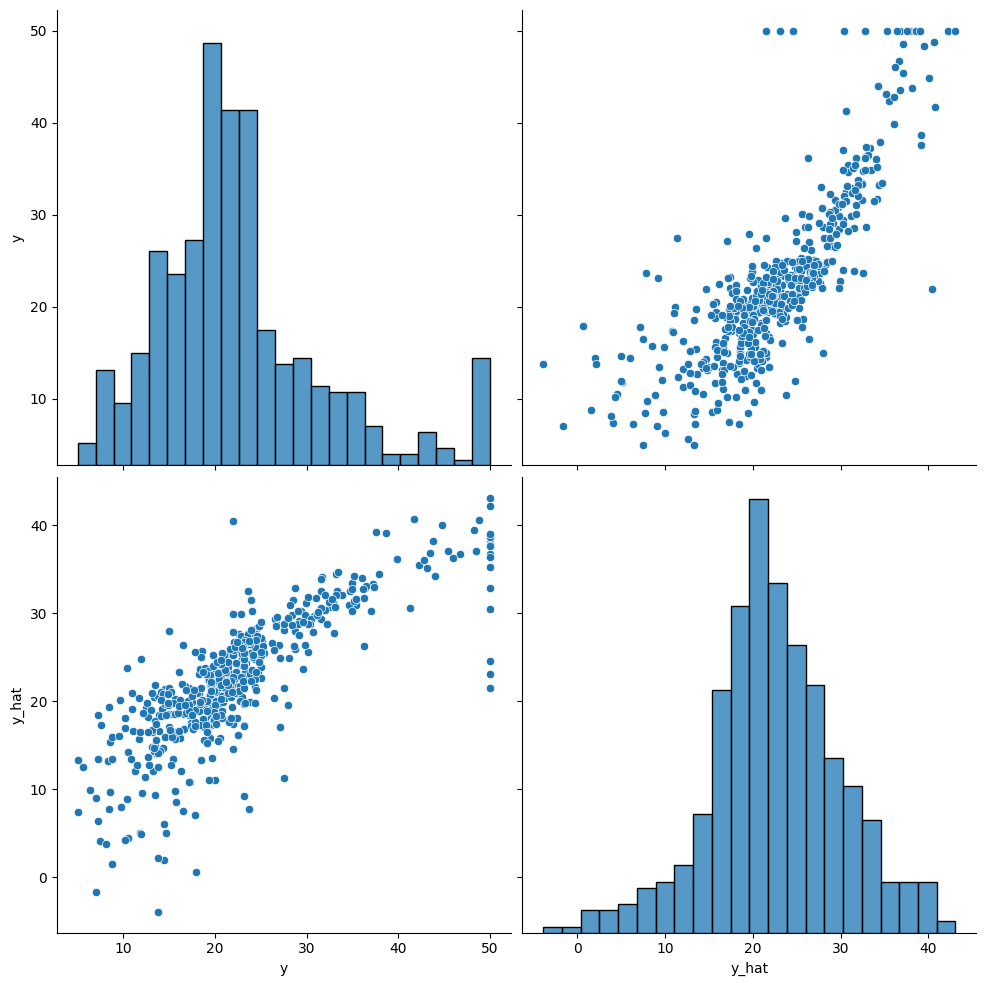

In [23]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=['y', 'y_hat'])
sns.pairplot(df, height=5)